In [1]:
import numpy as np
import pandas as pd
from scipy.stats import normaltest
from statsmodels.api import datasets
from statsmodels.api import graphics
from statsmodels.api import tsa
from statsmodels.api import stats
from datetime import datetime
from dateutil import parser
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.api import qqplot
import matplotlib.pyplot as plt
%matplotlib inline

### .导入数据

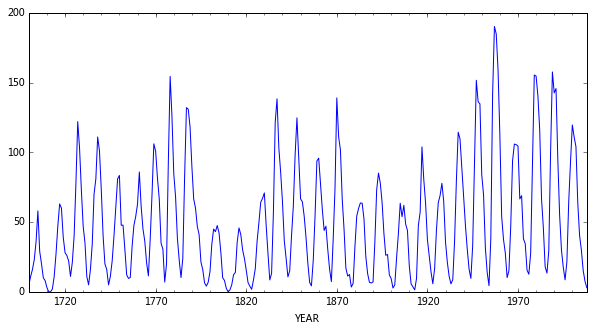

In [2]:
df = datasets.sunspots.load_pandas().data
df['YEAR'] = df['YEAR'].apply(lambda x: parser.parse(str(int(x))+'1231'))
x = df.set_index('YEAR').iloc[:,0]
x.plot(figsize=(10, 5))

### .刻画自相关函数
疑问: 蓝色填充区是什么意思?

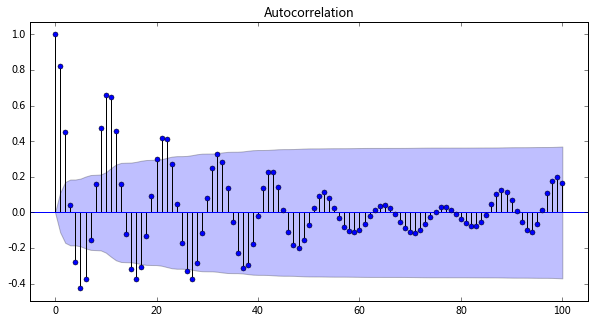

In [3]:
fig, ax = plt.subplots(figsize=(10, 5))
_ = graphics.tsa.plot_acf(x.values, lags=100, ax=ax)

### .计算acf

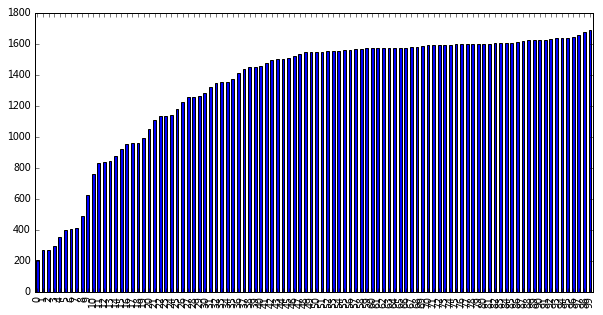

In [4]:
acfs, qstat, pvalue = acf(x, nlags=100, qstat=True)
result = pd.DataFrame({'acf': acfs[1:], 'qstat': qstat, 'pvalue': pvalue})
result['qstat'].plot(figsize=(10, 5), kind='bar')

In [5]:
result

,acf,pvalue,qstat
0,0.820201,1.445573e-47,209.898364
1,0.451268,3.792789e-60,273.644008
2,0.039577,3.932271e-59,274.135904
3,-0.275792,2.782219e-63,298.101169
4,-0.425239,1.287507e-74,355.263817
5,-0.376595,2.476984e-83,400.244449
6,-0.157374,4.313801e-84,408.125378
7,0.158203,6.671800e-85,416.115975
8,0.473098,2.337318e-99,487.812644
9,0.658980,2.381979e-128,627.382673


### .建模

In [6]:
arma = tsa.ARMA(x, (10,0)).fit()
print arma.params
print arma.aic, arma.bic, arma.hqic

const                 48.330123
ar.L1.SUNACTIVITY      1.161242
ar.L2.SUNACTIVITY     -0.395550
ar.L3.SUNACTIVITY     -0.166247
ar.L4.SUNACTIVITY      0.150478
ar.L5.SUNACTIVITY     -0.094606
ar.L6.SUNACTIVITY      0.009385
ar.L7.SUNACTIVITY      0.051715
ar.L8.SUNACTIVITY     -0.086698
ar.L9.SUNACTIVITY      0.254828
ar.L10.SUNACTIVITY    -0.002096
dtype: float64
2572.62128771 2617.42138304 2590.53245125


### .检查残差

In [7]:
resid = arma.resid
print stats.durbin_watson(resid)
normaltest(resid)

1.96668814466


NormaltestResult(statistic=37.24880392021732, pvalue=8.1568974061351873e-09)

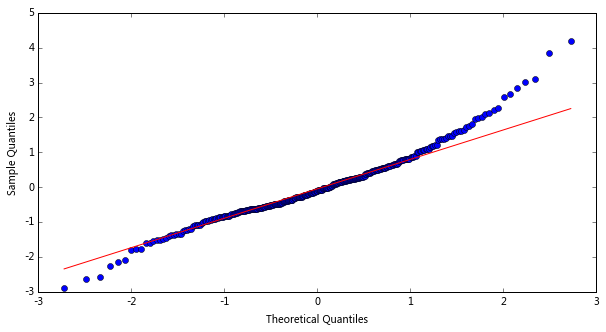

In [8]:
fig, ax = plt.subplots(figsize=(10, 5))
_ = qqplot(resid, line='q', ax=ax, fit=True)

### 生成预测结果

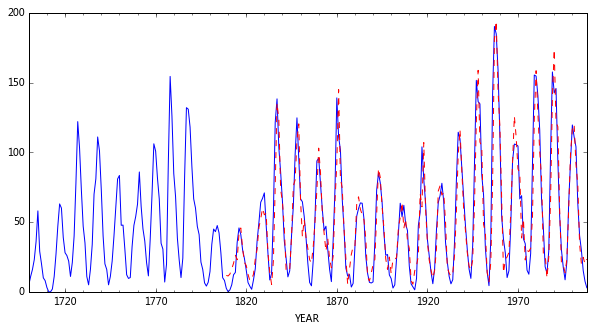

In [11]:
# result = arma.predict('1950', '2010')
# result = arma.predict('2000', '2050', dynamic=True)
# arma.predict('1900', '1900', dynamic=True).iloc[0]
result = x.index[-200:].to_series().astype(str).apply(lambda x: arma.predict(x, x, dynamic=True).iloc[0])
# result = arma.predict('1900', '1900', dynamic=True)
fig, ax = plt.subplots(figsize=(10, 5))
x.plot(ax=ax)
result.plot(ax=ax, style='r--')

### .参考
http://statsmodels.sourceforge.net/devel/examples/notebooks/generated/tsa_arma.html